In [2]:
import pandas as pd

In [4]:
data=pd.read_csv(r'C:\Users\Sahil\Downloads\archive\twitter_training.csv')

In [6]:
data

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
71756,9200,Nvidia,Positive,Just realized that the Windows partition of my...
71757,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
71758,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
71759,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       71761 non-null  int64 
 1   Entity         71761 non-null  object
 2   Sentiment      71761 non-null  object
 3   Tweet content  71435 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


In [10]:
data.describe()

,Tweet ID
count,71761.000000
mean,6439.289029
std,3743.128881
min,1.000000
25%,3204.000000
50%,6437.000000
75%,9610.000000
max,13200.000000


In [12]:
data.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet content    326
dtype: int64

In [14]:
data['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [16]:
data=data.dropna()

In [18]:
data.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet content    0
dtype: int64

In [20]:
data=data.drop(["Tweet content"],axis=1)

In [22]:
data

,Tweet ID,Entity,Sentiment
0,2401,Borderlands,Positive
1,2401,Borderlands,Positive
2,2401,Borderlands,Positive
3,2401,Borderlands,Positive
4,2401,Borderlands,Positive
...,...,...,...
71756,9200,Nvidia,Positive
71757,9200,Nvidia,Positive
71758,9200,Nvidia,Positive
71759,9200,Nvidia,Positive


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
enc=LabelEncoder()

In [26]:
data["Sentiment"]=enc.fit_transform(data["Sentiment"])

In [27]:
data["Entity"]=enc.fit_transform(data["Entity"])

In [28]:
data

,Tweet ID,Entity,Sentiment
0,2401,4,3
1,2401,4,3
2,2401,4,3
3,2401,4,3
4,2401,4,3
...,...,...,...
71756,9200,21,3
71757,9200,21,3
71758,9200,21,3
71759,9200,21,3


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71435 entries, 0 to 71760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Tweet ID   71435 non-null  int64
 1   Entity     71435 non-null  int32
 2   Sentiment  71435 non-null  int32
dtypes: int32(2), int64(1)
memory usage: 1.6 MB


In [36]:
x=data.drop("Sentiment",axis=1)

In [38]:
y=data["Sentiment"]

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
model=LogisticRegression()

In [48]:
model.fit(x_train,y_train)

C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model.score(x_train,y_train)

0.3193462588367047

In [52]:
model.score(x_test,y_test)

0.3202911737943585

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [56]:
y_p=model.predict(x_test)

In [58]:
accuracy_score(y_p,y_test)

0.3202911737943585

In [60]:
import seaborn as sns

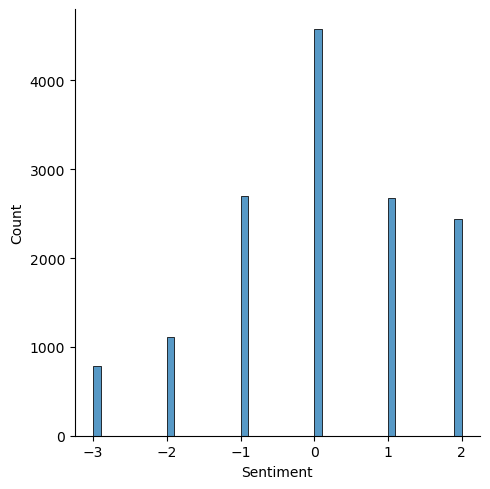

In [61]:
sns.displot((y_test-y_p),bins=50)

In [64]:
x_train.shape

(57148, 2)

In [66]:
y_train.shape

(57148,)

In [68]:
from  sklearn.ensemble import RandomForestClassifier 

In [70]:
model1=RandomForestClassifier()

In [72]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
model1.score(x_train,y_train)

1.0

In [76]:
model1.score(x_test,y_test)

0.998600125988661

In [78]:
y_pr=model1.predict(x_test)

In [80]:
accuracy_score(y_pr,y_test)

0.998600125988661

In [82]:
from sklearn.svm import SVC

In [84]:
model2=SVC(C=200,kernel="poly",degree=3)

In [ ]:
model2.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)